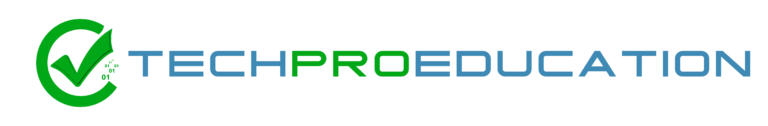

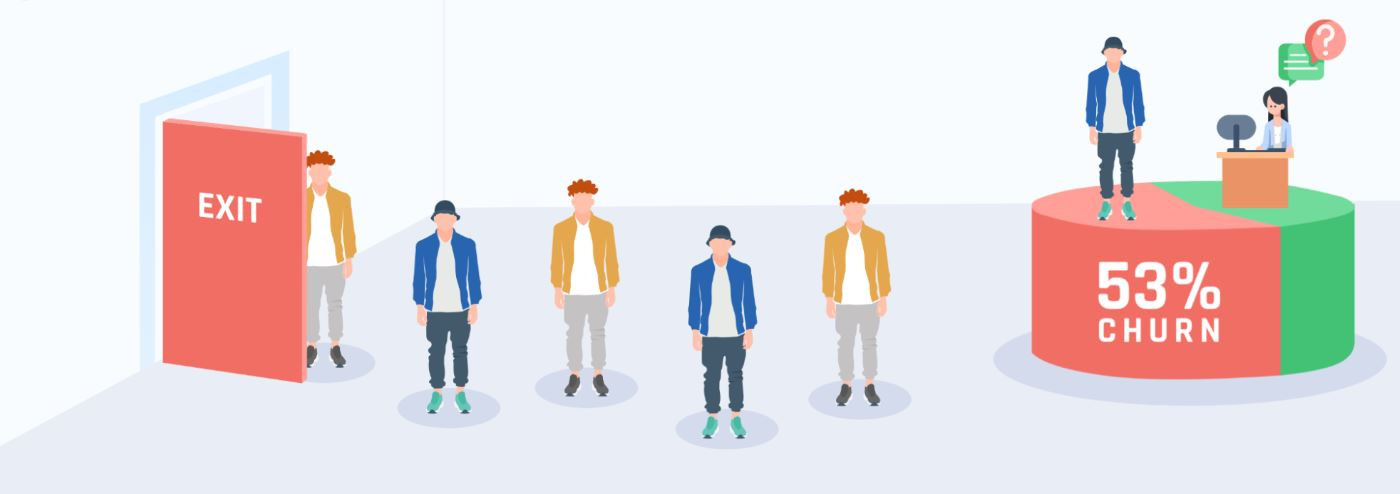

**Background and Context**

Businesses, including banks, face the challenge of customer churn, which refers to customers leaving one service provider and joining another. To address this issue, it is important for businesses to understand the factors that influence a customer's decision to leave. By identifying these factors, management can focus on improving the service in the areas that matter most to customers.

**Objective**

Create a neural network-based classifier that can accurately predict whether a bank customer will churn (leave) or not. This classifier will enable the bank to proactively identify customers who may be at risk of churning and take appropriate measures to retain them, ultimately helping the bank to retain customers and mitigate customer churn.

**About Dataset**

**RowNumber:** Corresponds to the record (row) number and has no effect on the output.

**CustomerId:** Contains random values and has no effect on customer leaving the bank.

**Surname:** The surname of a customer has no impact on their decision to leave the bank.

**CreditScore:** Can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

**Geography:** A customer’s location can affect their decision to leave the bank.

**Gender:** It’s interesting to explore whether gender plays a role in a customer leaving the bank.

**Age:** This is certainly relevant, since older customers are less likely to leave their bank than younger ones.

**Tenure:** Refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

**Balance:** Also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

**NumOfProducts:** Refers to the number of products that a customer has purchased through the bank.

**HasCrCard:** Denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

**IsActiveMember:** Active customers are less likely to leave the bank.

**EstimatedSalary:** As with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

**Exited:** Whether or not the customer left the bank.

# Keras Classification

## Import  libraries & data

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [99]:
df = pd.read_csv("churn.csv")

## Exploratory Data Analysis and Visualization

In [100]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [102]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [103]:
df.isnull().sum().any()

False

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


### RowNumber

In [105]:
df = df.drop('RowNumber', axis = 1)

### CustomerId

In [106]:
df = df.drop('CustomerId', axis = 1)

### Surname

In [107]:
df = df.drop('Surname', axis = 1)

### Exited

In [108]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

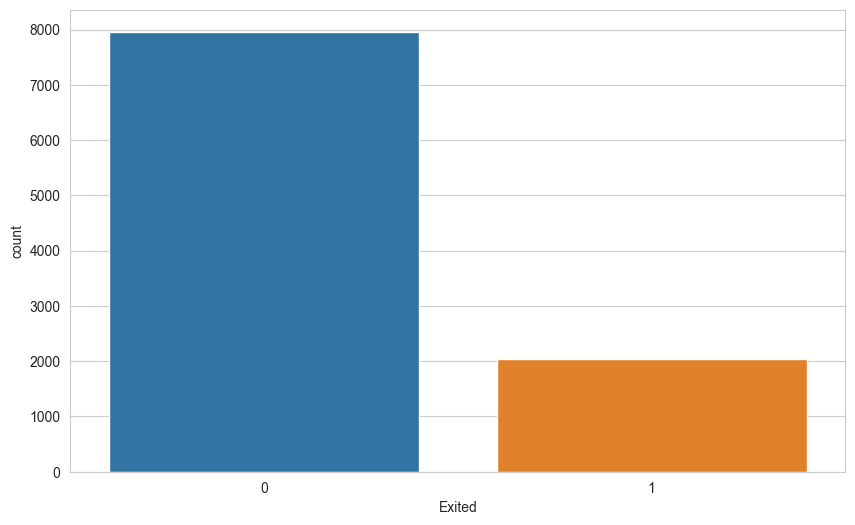

In [109]:
sns.countplot(df['Exited']);

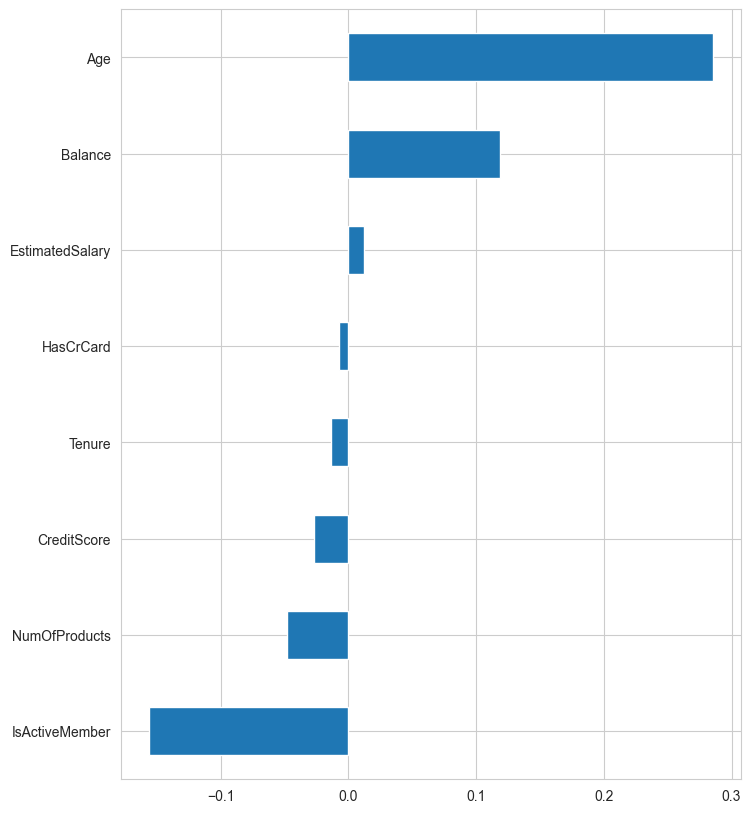

In [110]:
plt.figure(figsize = (8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");

### CreditScore

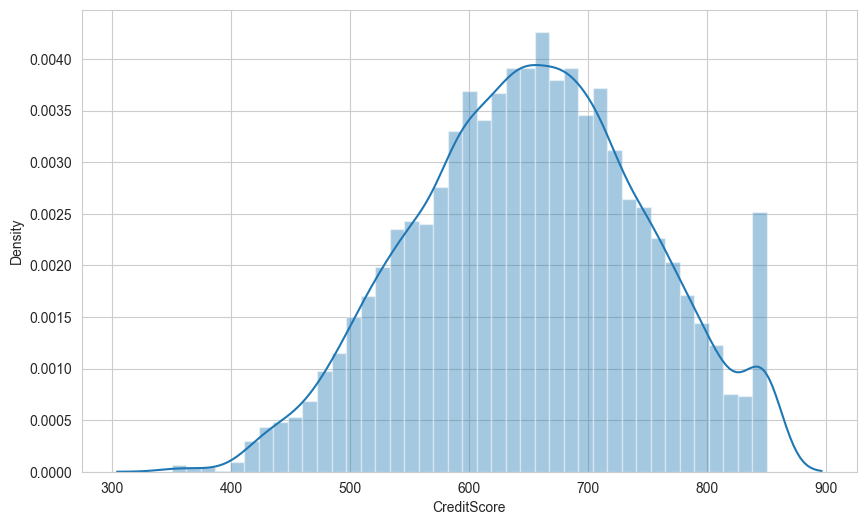

In [111]:
sns.distplot(df['CreditScore']);

In [112]:
df[df["CreditScore"] > 800].sort_values(by="CreditScore", ascending=False)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
5954,850,France,Male,33,0,124781.670,1,0,1,33700.520,0
6599,850,France,Male,49,6,128663.900,1,1,0,65769.300,1
6578,850,France,Female,28,9,0.000,2,1,0,185821.410,0
2683,850,Spain,Female,23,9,143054.850,1,0,1,62980.960,0
...,...,...,...,...,...,...,...,...,...,...,...
3188,801,France,Female,32,4,75170.540,1,1,1,37898.500,0
2527,801,France,Male,42,6,0.000,2,1,1,95804.330,0
370,801,Spain,Male,42,4,141947.670,1,1,1,10598.290,0
9192,801,Spain,Male,58,1,79954.610,2,1,1,30484.190,0


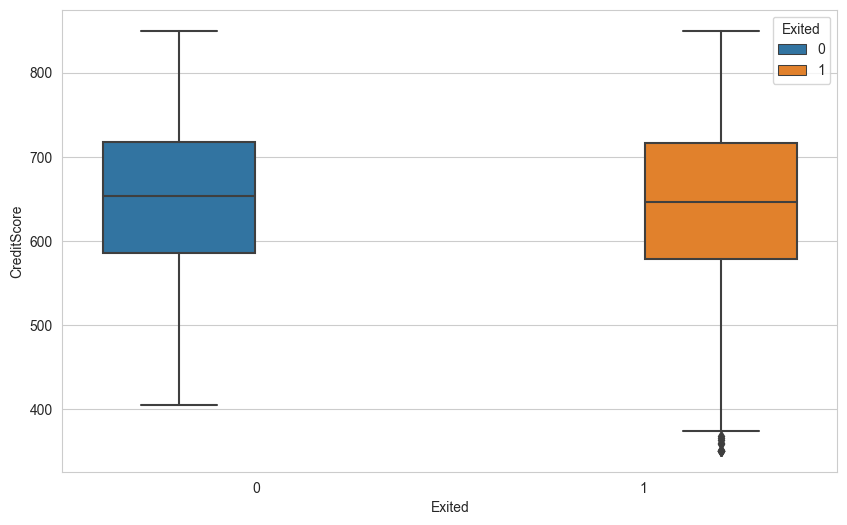

In [113]:
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df);

### Geography

In [114]:
df['Geography'].dtype

dtype('O')

In [115]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

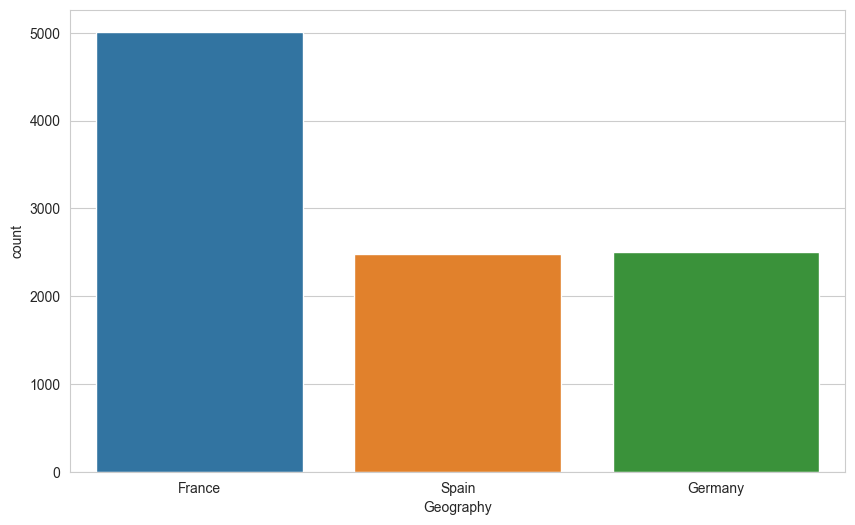

In [116]:
sns.countplot(df['Geography']);

### Gender

In [117]:
df['Gender'].dtype

dtype('O')

In [118]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

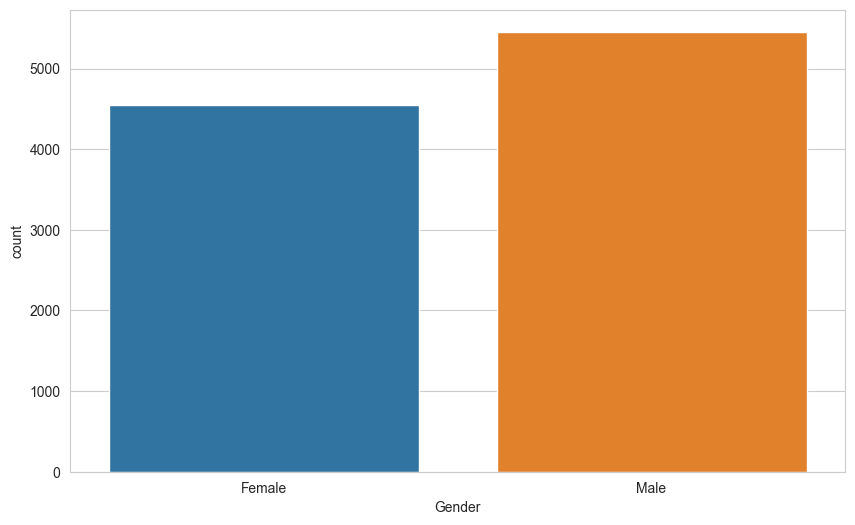

In [119]:
sns.countplot(df['Gender']);

### Age

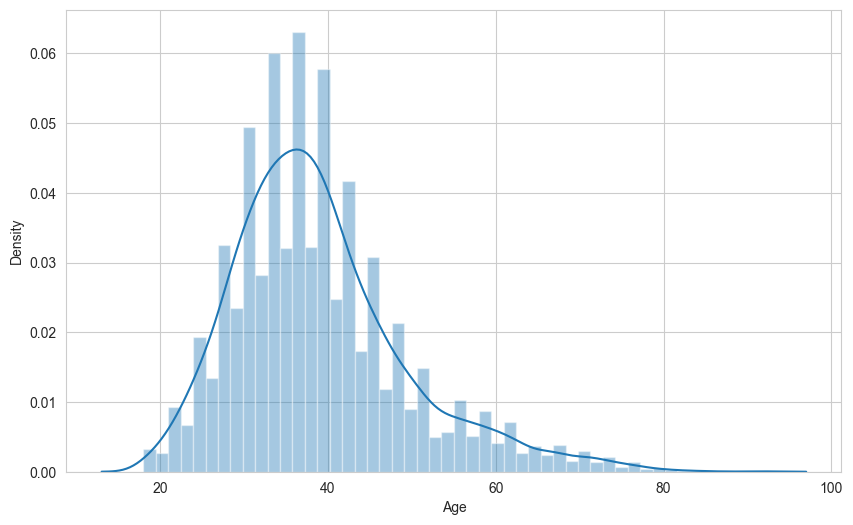

In [120]:
sns.distplot(df['Age']);

In [121]:
df[df["Age"] > 80].sort_values(by="Age", ascending=False)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6443,753,France,Male,92,3,121513.310,1,0,1,195563.990,0
6759,705,France,Male,92,1,126076.240,2,1,1,34436.830,0
2458,513,Spain,Male,88,10,0.000,2,1,1,52952.240,0
3033,787,France,Female,85,10,0.000,2,1,1,116537.960,0
3387,537,Germany,Male,84,8,92242.340,1,1,1,186235.980,0
3531,408,France,Female,84,8,87873.390,1,0,0,188484.520,1
9309,678,Germany,Male,83,6,123356.630,1,0,1,92934.410,0
766,700,France,Female,82,2,0.000,2,0,1,182055.360,0
4931,682,Germany,Male,81,6,122029.150,1,1,1,50783.880,0
7526,850,France,Female,81,1,0.000,2,1,1,59568.240,0


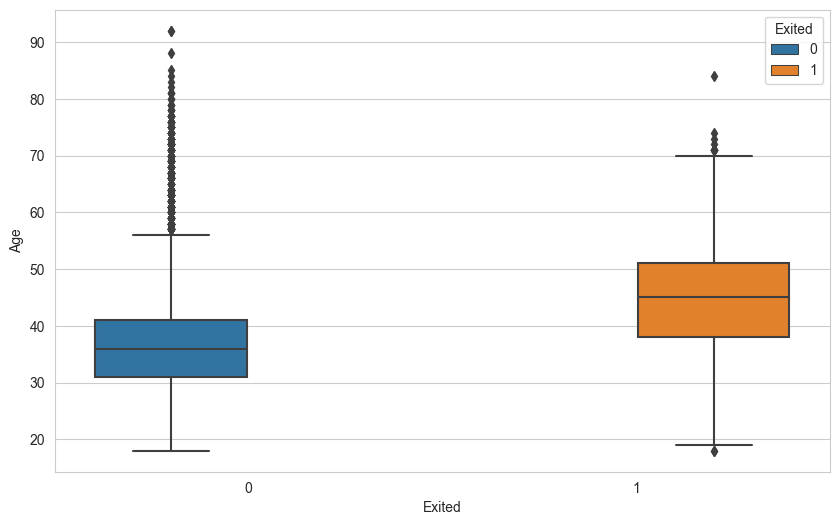

In [122]:
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df);

### Tenure

In [123]:
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

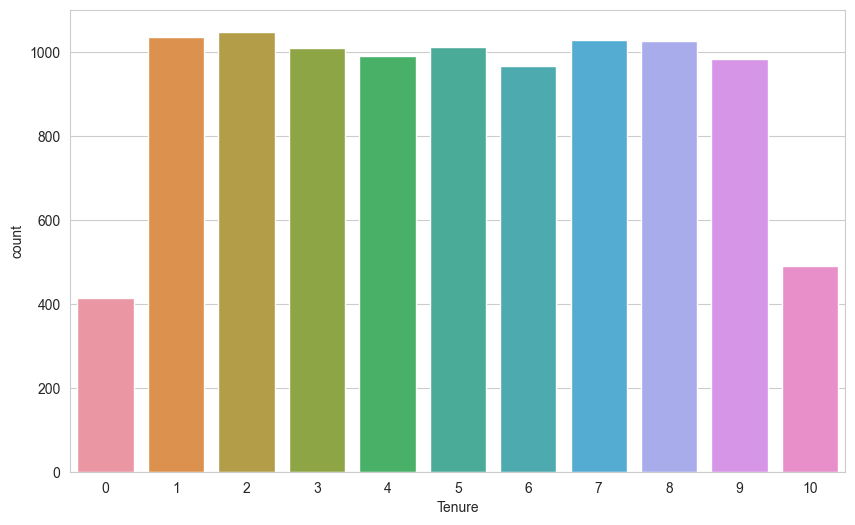

In [124]:
sns.countplot(df['Tenure']);

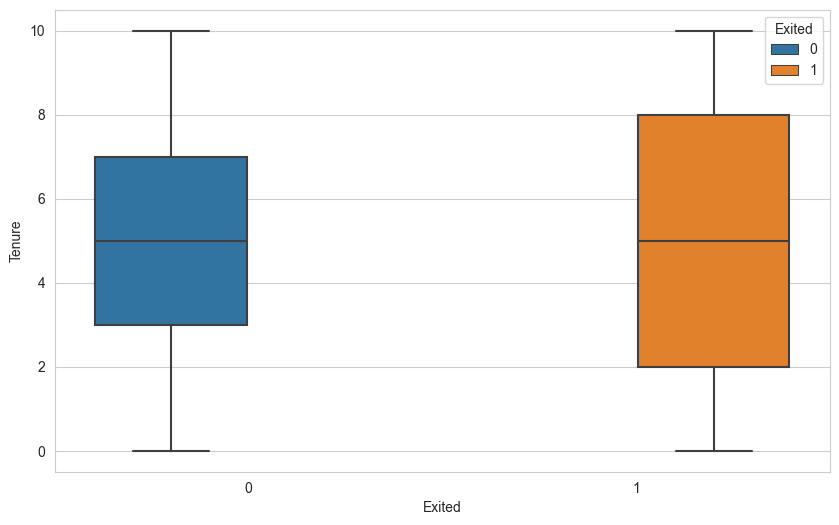

In [125]:
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df);

### Balance

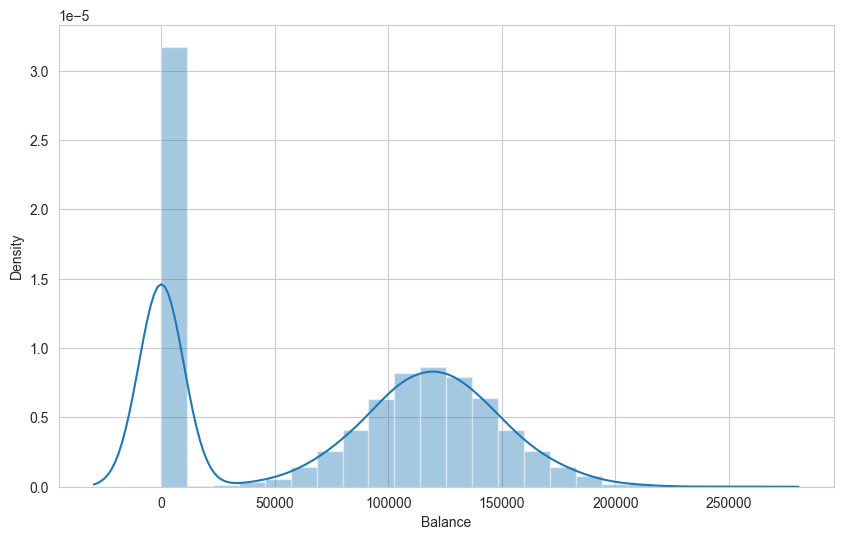

In [126]:
sns.distplot(df['Balance']);

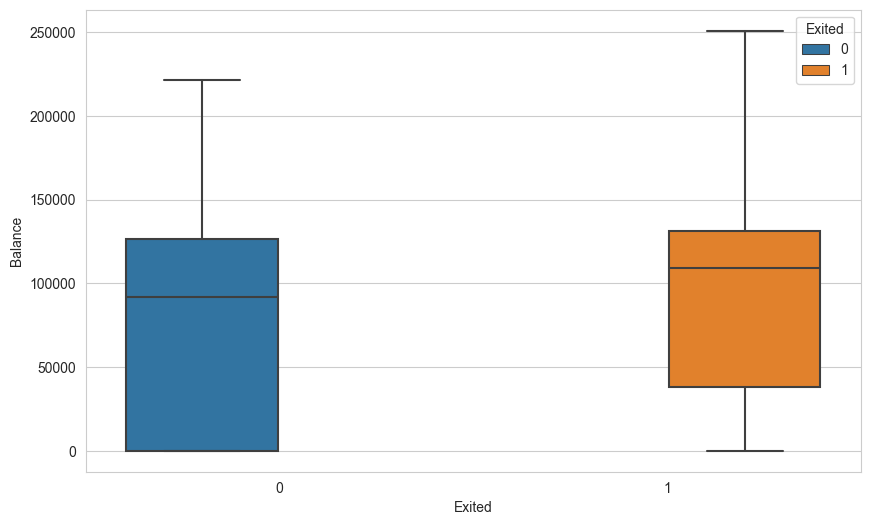

In [127]:
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df);

### NumOfProducts

In [128]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

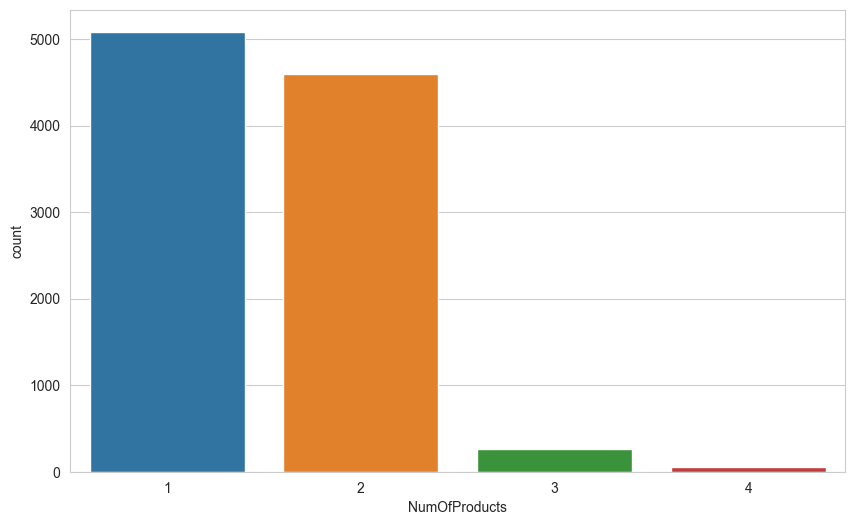

In [129]:
sns.countplot(df['NumOfProducts']);

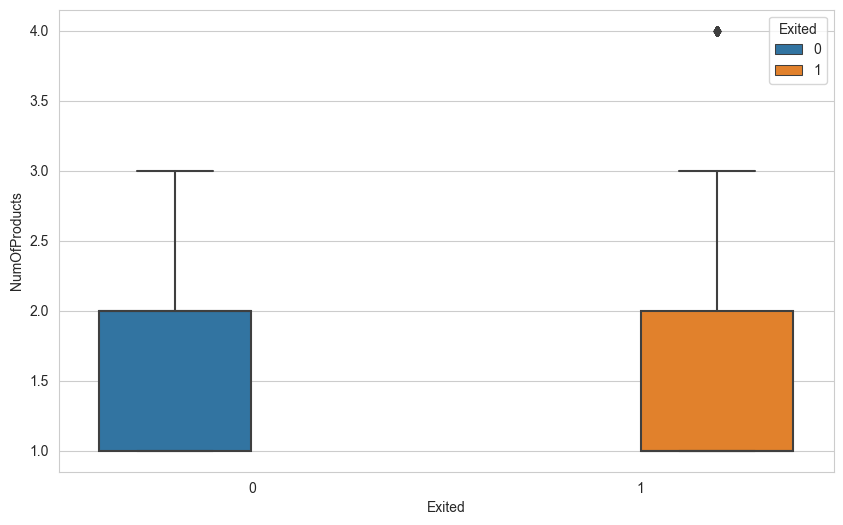

In [130]:
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df);

### HasCrCard

In [131]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

### IsActiveMember

In [132]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

### EstimatedSalary

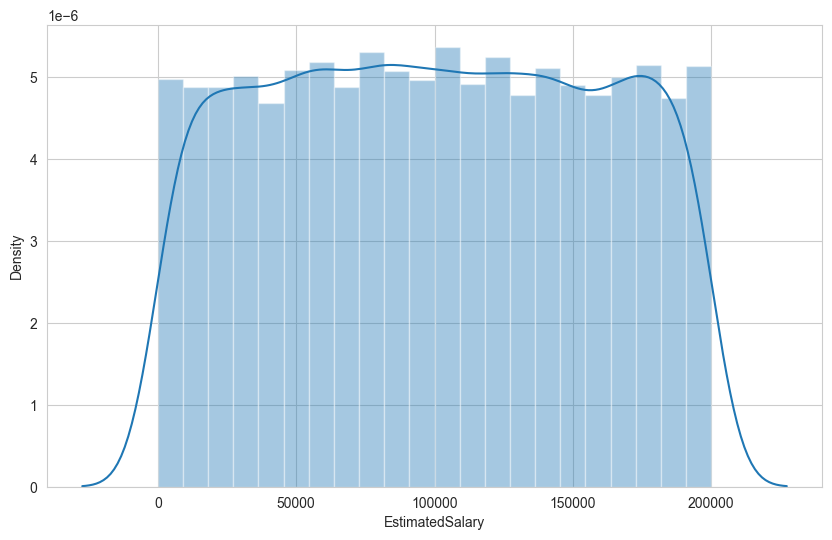

In [133]:
sns.distplot(df['EstimatedSalary']);

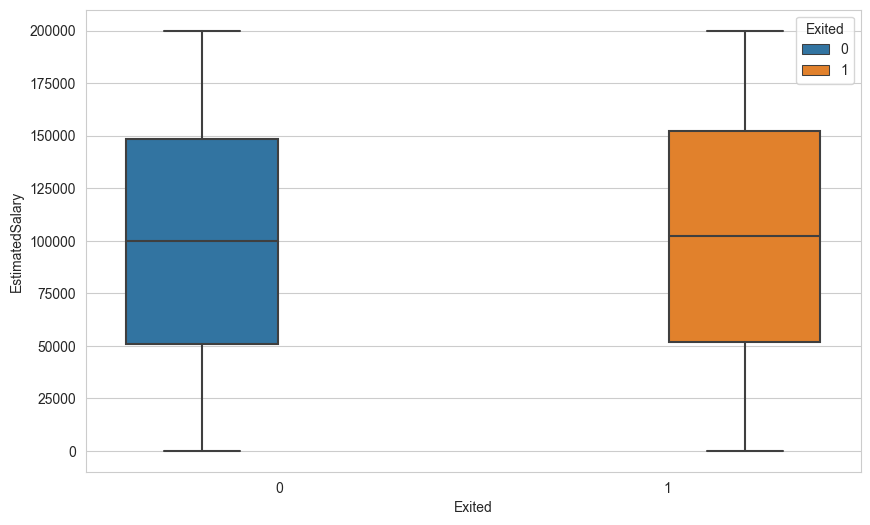

In [134]:
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df);

In [135]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [136]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


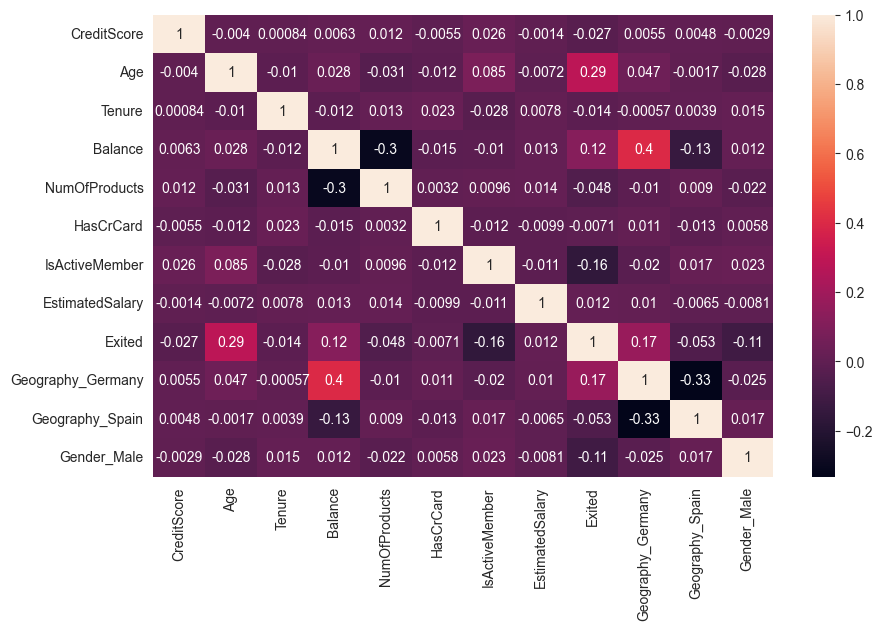

In [137]:
sns.heatmap(df.corr(), annot=True);

In [138]:
df = df.drop('Tenure', axis = 1)
df = df.drop('HasCrCard', axis = 1)
df = df.drop('EstimatedSalary', axis = 1)

In [186]:
df.head()

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,0.000,1,1,1,0,0,0
1,608,41,83807.860,1,1,0,0,1,0
2,502,42,159660.800,3,0,1,0,0,0
3,699,39,0.000,2,0,0,0,0,0
4,850,43,125510.820,1,1,0,0,1,0


## Preprocessing of Data

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [140]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [141]:
seed = 42

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.1,random_state=seed)

In [143]:
scaler = MinMaxScaler()

In [144]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

### without class_weigth

In [145]:
from keras import models
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [146]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [147]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [148]:
model = Sequential()

model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))


In [149]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics = ['Recall'])

In [150]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 25)

In [151]:
model.fit(x = X_train, y = y_train,validation_split = 0.20, batch_size = 128, epochs = 200, callbacks = [early_stop])

Epoch 1/200
57/57 [==============================] - 1s 5ms/step - loss: 0.7295 - recall: 0.7058 - val_loss: 0.6599 - val_recall: 0.0827
Epoch 2/200
57/57 [==============================] - 0s 2ms/step - loss: 0.6093 - recall: 0.0199 - val_loss: 0.5419 - val_recall: 0.0000e+00
Epoch 3/200
57/57 [==============================] - 0s 3ms/step - loss: 0.5008 - recall: 0.0000e+00 - val_loss: 0.4936 - val_recall: 0.0000e+00
Epoch 4/200
57/57 [==============================] - 0s 3ms/step - loss: 0.4796 - recall: 0.0000e+00 - val_loss: 0.4814 - val_recall: 0.0000e+00
Epoch 5/200
57/57 [==============================] - 0s 2ms/step - loss: 0.4717 - recall: 0.0000e+00 - val_loss: 0.4726 - val_recall: 0.0000e+00
Epoch 6/200
57/57 [==============================] - 0s 3ms/step - loss: 0.4649 - recall: 0.0000e+00 - val_loss: 0.4648 - val_recall: 0.0000e+00
Epoch 7/200
57/57 [==============================] - 0s 3ms/step - loss: 0.4583 - recall: 0.0082 - val_loss: 0.4548 - val_recall: 0.0667
Epoch

57/57 [==============================] - 0s 3ms/step - loss: 0.3526 - recall: 0.4362 - val_loss: 0.3355 - val_recall: 0.4587
Epoch 61/200
57/57 [==============================] - 0s 3ms/step - loss: 0.3531 - recall: 0.4012 - val_loss: 0.3354 - val_recall: 0.5093
Epoch 62/200
57/57 [==============================] - 0s 3ms/step - loss: 0.3523 - recall: 0.4300 - val_loss: 0.3335 - val_recall: 0.4693
Epoch 63/200
57/57 [==============================] - 0s 3ms/step - loss: 0.3531 - recall: 0.4259 - val_loss: 0.3338 - val_recall: 0.4533
Epoch 64/200
57/57 [==============================] - 0s 3ms/step - loss: 0.3526 - recall: 0.4211 - val_loss: 0.3320 - val_recall: 0.4747
Epoch 65/200
57/57 [==============================] - 0s 3ms/step - loss: 0.3506 - recall: 0.4287 - val_loss: 0.3322 - val_recall: 0.4613
Epoch 66/200
57/57 [==============================] - 0s 3ms/step - loss: 0.3498 - recall: 0.4335 - val_loss: 0.3329 - val_recall: 0.4480
Epoch 67/200
57/57 [===========================

57/57 [==============================] - 0s 3ms/step - loss: 0.3399 - recall: 0.4383 - val_loss: 0.3235 - val_recall: 0.5093
Epoch 120/200
57/57 [==============================] - 0s 3ms/step - loss: 0.3398 - recall: 0.4355 - val_loss: 0.3221 - val_recall: 0.4827
Epoch 121/200
57/57 [==============================] - 0s 3ms/step - loss: 0.3397 - recall: 0.4342 - val_loss: 0.3217 - val_recall: 0.4640
Epoch 122/200
57/57 [==============================] - 0s 3ms/step - loss: 0.3395 - recall: 0.4424 - val_loss: 0.3215 - val_recall: 0.4720
Epoch 123/200
57/57 [==============================] - 0s 3ms/step - loss: 0.3394 - recall: 0.4396 - val_loss: 0.3221 - val_recall: 0.4800
Epoch 124/200
57/57 [==============================] - 0s 3ms/step - loss: 0.3388 - recall: 0.4424 - val_loss: 0.3228 - val_recall: 0.5093
Epoch 125/200
57/57 [==============================] - 0s 3ms/step - loss: 0.3401 - recall: 0.4424 - val_loss: 0.3228 - val_recall: 0.5173
Epoch 126/200
57/57 [====================

57/57 [==============================] - 0s 3ms/step - loss: 0.3359 - recall: 0.4534 - val_loss: 0.3192 - val_recall: 0.5387
Epoch 179/200
57/57 [==============================] - 0s 3ms/step - loss: 0.3337 - recall: 0.4520 - val_loss: 0.3188 - val_recall: 0.5013
Epoch 180/200
57/57 [==============================] - 0s 3ms/step - loss: 0.3349 - recall: 0.4616 - val_loss: 0.3195 - val_recall: 0.4933
Epoch 181/200
57/57 [==============================] - 0s 3ms/step - loss: 0.3345 - recall: 0.4547 - val_loss: 0.3192 - val_recall: 0.4720
Epoch 182/200
57/57 [==============================] - 0s 3ms/step - loss: 0.3348 - recall: 0.4534 - val_loss: 0.3195 - val_recall: 0.5333
Epoch 183/200
57/57 [==============================] - 0s 3ms/step - loss: 0.3343 - recall: 0.4609 - val_loss: 0.3191 - val_recall: 0.4667
Epoch 184/200
57/57 [==============================] - 0s 3ms/step - loss: 0.3347 - recall: 0.4506 - val_loss: 0.3213 - val_recall: 0.4373
Epoch 185/200
57/57 [====================

In [152]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                144       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [153]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.729,0.706,0.660,0.083
1,0.609,0.020,0.542,0.000
2,0.501,0.000,0.494,0.000
3,0.480,0.000,0.481,0.000
4,0.472,0.000,0.473,0.000


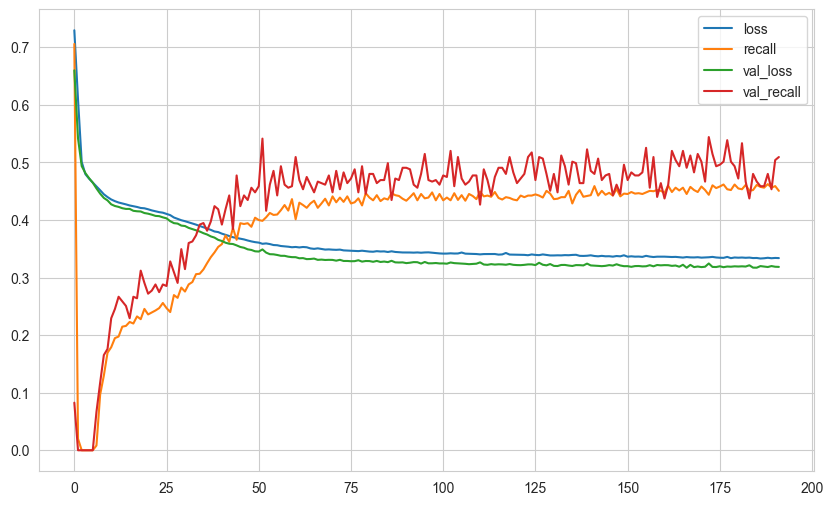

In [154]:
loss_df.plot();

In [155]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

32/32 [==============================] - 0s 2ms/step


In [156]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[763  33]
 [106  98]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.75      0.48      0.59       204

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



In [157]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
    

### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

In [158]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score


32/32 [==============================] - 0s 1ms/step


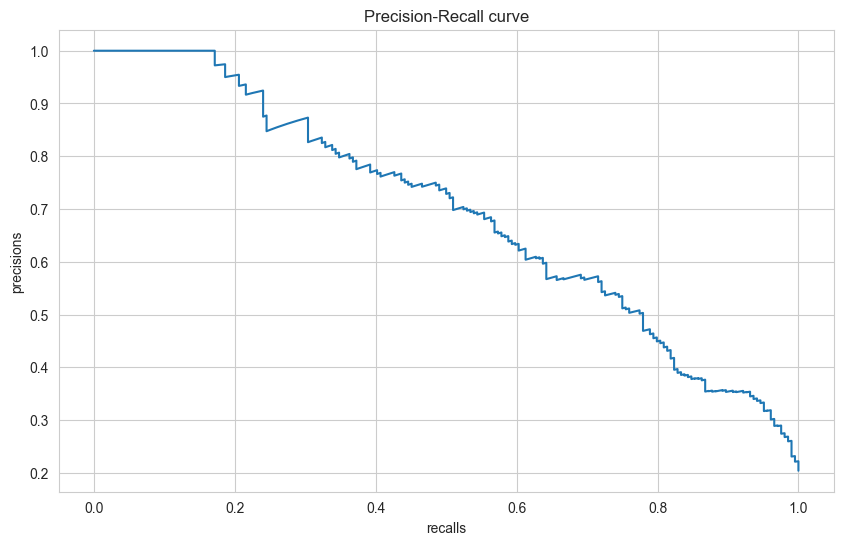

In [159]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [160]:
average_precision_score(y_test, y_pred_proba)

0.6933459601837517

### with class_weigth

In [161]:
model = Sequential()

model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [162]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics = ['Recall'])

In [163]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [164]:
model.fit(x = X_train, y = y_train,validation_split = 0.20, batch_size = 128, epochs = 200, callbacks = [early_stop], class_weight=class_weights)

Epoch 1/200
57/57 [==============================] - 1s 6ms/step - loss: 0.6759 - recall: 0.4691 - val_loss: 0.6477 - val_recall: 0.5120
Epoch 2/200
57/57 [==============================] - 0s 3ms/step - loss: 0.6583 - recall: 0.5178 - val_loss: 0.6379 - val_recall: 0.5547
Epoch 3/200
57/57 [==============================] - 0s 3ms/step - loss: 0.6463 - recall: 0.5418 - val_loss: 0.6227 - val_recall: 0.5733
Epoch 4/200
57/57 [==============================] - 0s 3ms/step - loss: 0.6360 - recall: 0.5940 - val_loss: 0.6135 - val_recall: 0.6080
Epoch 5/200
57/57 [==============================] - 0s 3ms/step - loss: 0.6280 - recall: 0.5981 - val_loss: 0.6162 - val_recall: 0.6613
Epoch 6/200
57/57 [==============================] - 0s 3ms/step - loss: 0.6195 - recall: 0.6495 - val_loss: 0.6119 - val_recall: 0.6773
Epoch 7/200
57/57 [==============================] - 0s 3ms/step - loss: 0.6121 - recall: 0.6385 - val_loss: 0.6168 - val_recall: 0.7067
Epoch 8/200
57/57 [======================

57/57 [==============================] - 0s 3ms/step - loss: 0.4776 - recall: 0.7538 - val_loss: 0.4722 - val_recall: 0.8053
Epoch 61/200
57/57 [==============================] - 0s 3ms/step - loss: 0.4783 - recall: 0.7455 - val_loss: 0.4556 - val_recall: 0.7893
Epoch 62/200
57/57 [==============================] - 0s 3ms/step - loss: 0.4782 - recall: 0.7469 - val_loss: 0.4609 - val_recall: 0.8000
Epoch 63/200
57/57 [==============================] - 0s 3ms/step - loss: 0.4774 - recall: 0.7572 - val_loss: 0.4480 - val_recall: 0.7813
Epoch 64/200
57/57 [==============================] - 0s 3ms/step - loss: 0.4781 - recall: 0.7353 - val_loss: 0.4468 - val_recall: 0.7813
Epoch 65/200
57/57 [==============================] - 0s 3ms/step - loss: 0.4774 - recall: 0.7407 - val_loss: 0.4740 - val_recall: 0.8133
Epoch 66/200
57/57 [==============================] - 0s 3ms/step - loss: 0.4766 - recall: 0.7517 - val_loss: 0.4349 - val_recall: 0.7733
Epoch 67/200
57/57 [===========================

In [165]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.676,0.469,0.648,0.512
1,0.658,0.518,0.638,0.555
2,0.646,0.542,0.623,0.573
3,0.636,0.594,0.614,0.608
4,0.628,0.598,0.616,0.661


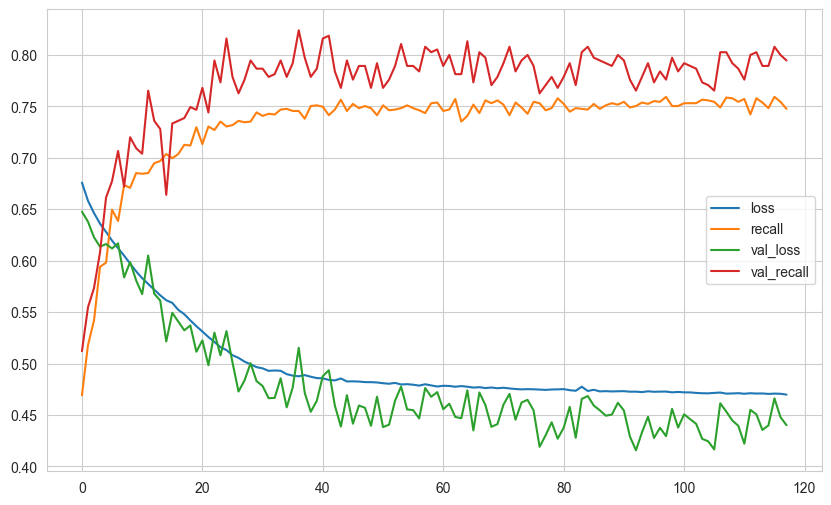

In [166]:
loss_df.plot();

In [167]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


#      precision    recall  f1-score   support

#  0       0.86      0.97      0.92       796
#  1       0.79      0.41      0.54       204

32/32 [==============================] - 0s 1ms/step
[[617 179]
 [ 50 154]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.84       796
           1       0.46      0.75      0.57       204

    accuracy                           0.77      1000
   macro avg       0.69      0.77      0.71      1000
weighted avg       0.83      0.77      0.79      1000



### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

32/32 [==============================] - 0s 1ms/step


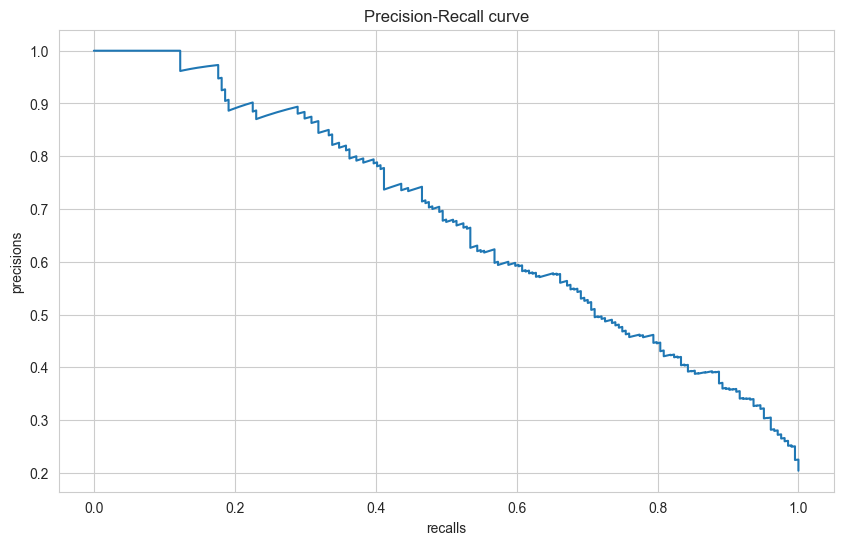

In [168]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [169]:
average_precision_score(y_test, y_pred_proba) 

0.679319082236365

## Final Model and Model Deployment

In [170]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [171]:
model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics = ['Recall'])

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop],
          batch_size=256,
          epochs=200,
          verbose=1,
          class_weight=class_weights) 

Epoch 1/200
36/36 [==============================] - 1s 9ms/step - loss: 0.6913 - recall: 0.2924 - val_loss: 0.6486 - val_recall: 0.3824
Epoch 2/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6678 - recall: 0.4779 - val_loss: 0.6451 - val_recall: 0.5343
Epoch 3/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6530 - recall: 0.5385 - val_loss: 0.6424 - val_recall: 0.5882
Epoch 4/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6414 - recall: 0.5941 - val_loss: 0.6380 - val_recall: 0.6176
Epoch 5/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6326 - recall: 0.6492 - val_loss: 0.6237 - val_recall: 0.6029
Epoch 6/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6252 - recall: 0.6470 - val_loss: 0.6315 - val_recall: 0.6275
Epoch 7/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6178 - recall: 0.6465 - val_loss: 0.6376 - val_recall: 0.6667
Epoch 8/200
36/36 [======================

36/36 [==============================] - 0s 3ms/step - loss: 0.4755 - recall: 0.7572 - val_loss: 0.4566 - val_recall: 0.7206
Epoch 61/200
36/36 [==============================] - 0s 3ms/step - loss: 0.4749 - recall: 0.7501 - val_loss: 0.4859 - val_recall: 0.7598
Epoch 62/200
36/36 [==============================] - 0s 3ms/step - loss: 0.4745 - recall: 0.7578 - val_loss: 0.4788 - val_recall: 0.7500
Epoch 63/200
36/36 [==============================] - 0s 3ms/step - loss: 0.4742 - recall: 0.7572 - val_loss: 0.4580 - val_recall: 0.7255
Epoch 64/200
36/36 [==============================] - 0s 3ms/step - loss: 0.4738 - recall: 0.7561 - val_loss: 0.4619 - val_recall: 0.7353
Epoch 65/200
36/36 [==============================] - 0s 3ms/step - loss: 0.4733 - recall: 0.7518 - val_loss: 0.5016 - val_recall: 0.7794
Epoch 66/200
36/36 [==============================] - 0s 3ms/step - loss: 0.4724 - recall: 0.7638 - val_loss: 0.4550 - val_recall: 0.7255
Epoch 67/200
36/36 [===========================

In [172]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.691,0.292,0.649,0.382
1,0.668,0.478,0.645,0.534
2,0.653,0.538,0.642,0.588
3,0.641,0.594,0.638,0.618
4,0.633,0.649,0.624,0.603


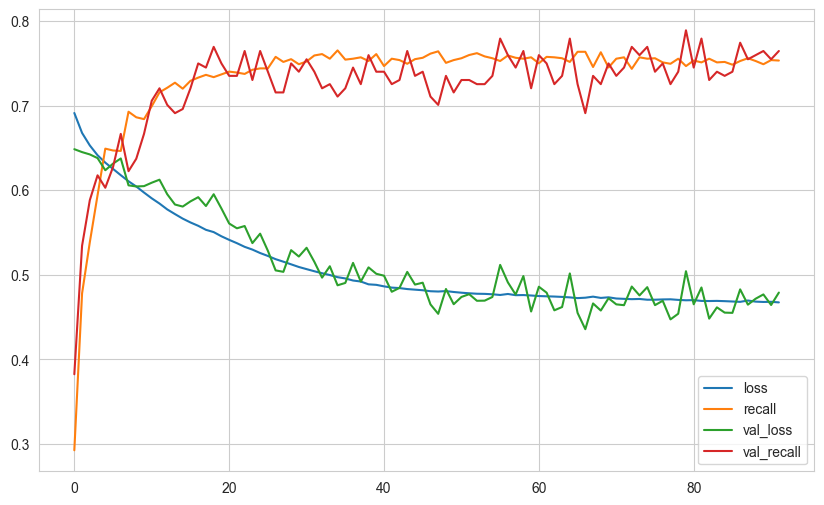

In [173]:
loss_df.plot();

In [174]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.47896578907966614
recall :  0.7647058963775635


In [175]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[607 189]
 [ 48 156]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       796
           1       0.45      0.76      0.57       204

    accuracy                           0.76      1000
   macro avg       0.69      0.76      0.70      1000
weighted avg       0.83      0.76      0.78      1000



In [176]:
model.save('model_churn.h5')

### Prediction

In [177]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore         619.000
Age                  42.000
Balance               0.000
NumOfProducts         1.000
IsActiveMember        1.000
Geography_Germany     0.000
Geography_Spain       0.000
Gender_Male           0.000
Name: 0, dtype: float64

In [179]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 8))
single_customer

array([[0.538     , 0.32432432, 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        ]])

In [180]:
y_pred =(model.predict(single_customer) > 0.5).astype("int32")
y_pred

1/1 [==============================] - 0s 45ms/step


array([[1]])

In [181]:
df["Exited"].iloc[0]

1

## Comparison with ML

### Logistic Regression

In [182]:
from sklearn.linear_model import LogisticRegression

In [183]:
log_model=LogisticRegression(class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[562 234]
 [ 66 138]]
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       796
           1       0.37      0.68      0.48       204

    accuracy                           0.70      1000
   macro avg       0.63      0.69      0.63      1000
weighted avg       0.79      0.70      0.73      1000



### Random Forest

In [184]:
from sklearn.ensemble import RandomForestClassifier

In [185]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[751  45]
 [115  89]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       796
           1       0.66      0.44      0.53       204

    accuracy                           0.84      1000
   macro avg       0.77      0.69      0.72      1000
weighted avg       0.83      0.84      0.83      1000



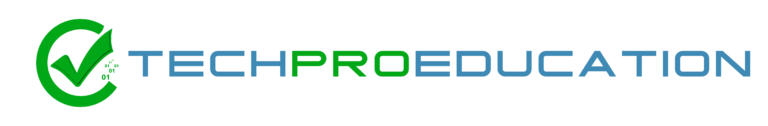